In [1]:
%matplotlib inline

# Import liberies
from PIL import Image
import   numpy  as np   
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   time

In [2]:
def MyGaussKern(sigma, prec):
    # Calculate kernel size based on the standard deviation nad precision
    size = int(sigma * prec)
    
    # Generate x coordinates of kernel values
    x = np.arange(size*2+1) - size
    
    # Calculate Gaussian function and normalize to sum 1
    kernel = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2))
    kernel /= np.sum(kernel)
    
    # Normalize so, that the edge values of the kernel equal 1
    # kernel = np.round(kernel/kernel[0])
    
    # Calculate normal factor Nf
    # Nf = 1/np.sum(kernel)
    
    return kernel

In [3]:
MyGaussKern(1.05, 2.5)

array([0.06276704, 0.24468565, 0.38509462, 0.24468565, 0.06276704])

In [4]:
def MySepConvolution1D(img, kern, axis):
    # Get the kernel size and center
    ksize = len(kern)
    center = ksize // 2
    
    # Get the image dimensions
    img2 = np.array(img)
    rows, cols = img2.shape
    
    # Initialize the output image
    output = np.zeros_like(img2)
    
    # Loop over the image rows
    for r in range(rows):
        # Loop over the image columns
        for c in range(cols):
            # Compute the start and end indices of the kernel in the current row or column
            if axis == 'horizontal':
                start = max(0, c - center)
                end = min(cols, c + center + 1)
                kernel_slice = kern[center - c + start : center - c + end]
                pixels = img2[r, start : end]
            elif axis == 'vertical':
                start = max(0, r - center)
                end = min(rows, r + center + 1)
                kernel_slice = kern[center - r + start : center - r + end]
                pixels = img2[start:end, c]
            else:
                raise ValueError('Invalid axis parameter')
            # Compute the weighted sum of the kernel and the image pixels in the current row or column
            output[r, c] = np.sum(kernel_slice * pixels)
    return output

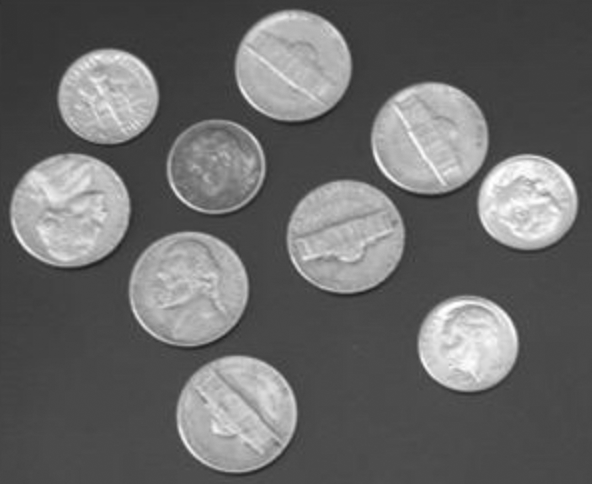

In [5]:
# Load image with PIL
img = Image.open("coins.bmp")
img2 = np.array(img)
img

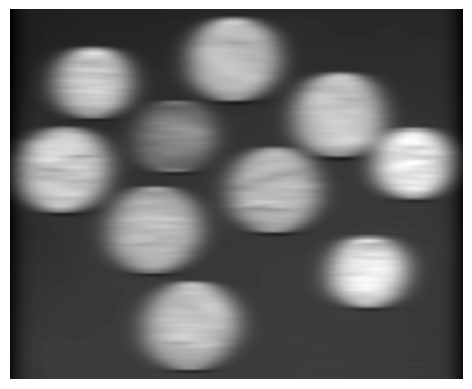

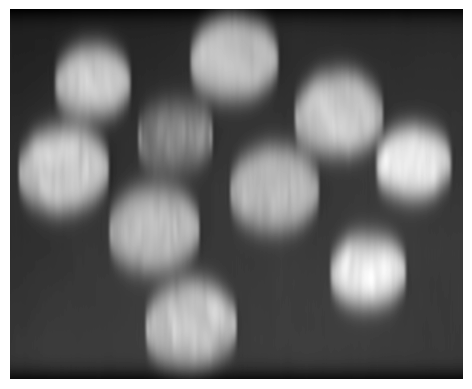

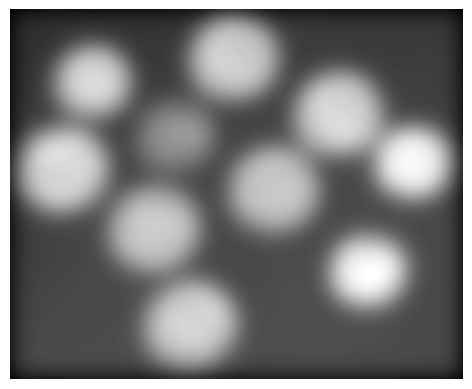

In [6]:
kernel = MyGaussKern(15, 4)
imgH = MySepConvolution1D(img, kernel,'horizontal')
imgV = MySepConvolution1D(img, kernel,'vertical')
plt.imshow(imgH, cmap='gray')
plt.axis(False)
plt.show()
plt.imshow(imgV, cmap='gray')
plt.axis(False)
plt.show()
plt.imshow(MySepConvolution1D(imgV,kernel,'horizontal'), cmap='gray')
plt.axis(False)
plt.show()